In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder #converting categorical data into numerical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("play_tennis.csv")  # Replace with your actual file
df.head()
df.tail()

,Outlook,Temperature,Humidity,Wind,PlayTennis
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [10]:
# Create a copy of the dataset
df_encoded = df.copy()

# Encode all categorical columns into numerical data
le = LabelEncoder()
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

print(df_encoded)

    Outlook  Temperature  Humidity  Wind  PlayTennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


In [4]:
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

In [5]:
# Initialize and train model
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


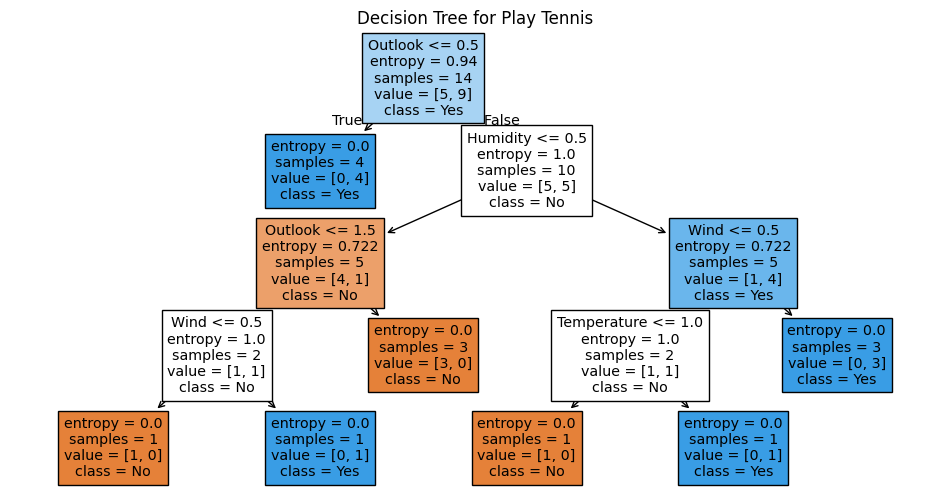

In [6]:
# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Play Tennis")
plt.show()

In [7]:
y_pred = model.predict(X)
print("Predictions:", y_pred)

Predictions: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 1.0
[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

